# Fig 1 Behavioral Analysis

In [1]:
# Set variables
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

sys.path.append('../../functionScripts/')
import helperFunctions as hf

dataDir = '../../Data/behavioral/HTR_summary_data.csv'
df = pd.read_csv(dataDir)
df.head()


,animal,sex,drug,total_HTR,time_to_peak,peak_val,FWHM_length,FWHM_val
0,five_MEO_DMT_1,Female,5-MeO-DMT,89,2,9,3,3.50
1,five_MEO_DMT_2,Female,5-MeO-DMT,85,4,9,4,4.05
2,five_MEO_DMT_3,Female,5-MeO-DMT,68,0,7,12,2.30
3,five_MEO_DMT_4,Male,5-MeO-DMT,52,0,8,2,1.75
4,five_MEO_DMT_5,Male,5-MeO-DMT,87,2,8,3,3.45


In [2]:
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 20*1.2
plt.rcParams['svg.fonttype'] = 'none'

# Some parameters
lineWidth = 1
figHeight = 6
figWidthHT_Count = 6.77
figWidthHT_Peak = 3.385


## HTR_total

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6-Fluoro-DET vs. Psilocybin: Mann-Whitney-Wilcoxon test two-sided, P_val:8.127e-03 U_stat=1.000e+00
Saline vs. Psilocybin: Mann-Whitney-Wilcoxon test two-sided, P_val:3.361e-03 U_stat=0.000e+00
6-Fluoro-DET vs. 5-MeO-DMT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.002e-02 U_stat=3.000e+00
Saline vs. 5-MeO-DMT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.361e-03 U_stat=0.000e+00


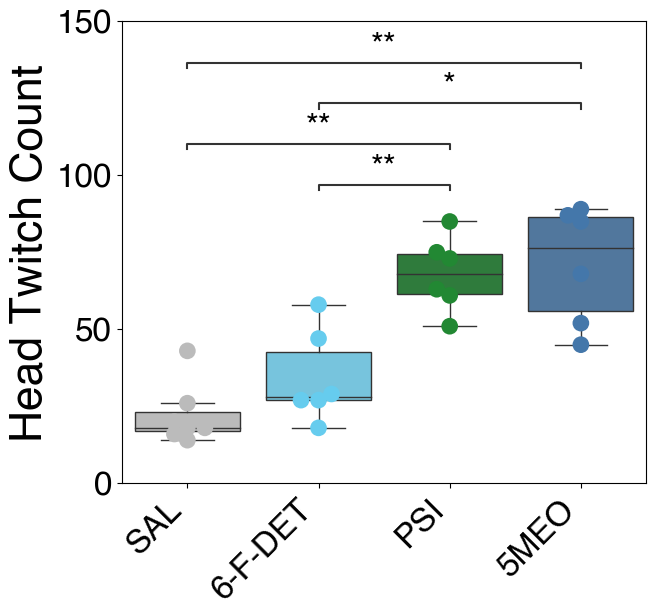

In [4]:
# Processing
import seaborn as sns
# from statannotations import add_stat_annotation
from statannotations.Annotator import Annotator
import importlib
import numpy as np

sys.path.append('../functionScripts/')

# Make a box and whisker plot of the df data representing each drug and time_to_peak
# df = df[df['drug'].isin(['Psilocybin', '5-MeO-DMT'])]
# df = df[df['drug'].isin(['Psilocybin', '5-MeO-DMT'])]
importlib.reload(hf)

colorDict = hf.create_color_dict()

# Plot the box and whisker plot
plt.figure(figsize=(figWidthHT_Count, figHeight))

plotOrder = ['Saline', '6-Fluoro-DET', 'Psilocybin', '5-MeO-DMT']
tickLabels = ['SAL', '6-F-DET', 'PSI', '5MEO']

colorPal = [colorDict[tickLabel] for tickLabel in tickLabels]

boxprops = dict() # alpha=0.7
ax = sns.boxplot(data=df, x= 'drug', y= 'total_HTR', order=plotOrder, palette=colorPal, boxprops=boxprops, linewidth=lineWidth) 
ax.legend().remove()
sns.swarmplot(data=df, x= 'drug', y= 'total_HTR', color='black', order=plotOrder, size=12, palette=colorPal) # order=['Psilocybin', '5-MeO-DMT']

# Stats - Place here to keep lines within the figure.
pairs = [('Saline', 'Psilocybin'), ('6-Fluoro-DET', 'Psilocybin'), ('Saline', '5-MeO-DMT'), ('6-Fluoro-DET', '5-MeO-DMT')]
annotator = Annotator(ax, pairs, data=df, x='drug', y='total_HTR', order=plotOrder)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

# Label the axes
plt.ylim(0, 150)
plt.xticks(ticks=[0, 1, 2, 3], labels=tickLabels, rotation=45, ha='right')
plt.yticks(np.arange(0, 151, 50))

plt.ylabel('Head Twitch Count', fontsize=30*1.067)
plt.xlabel('', fontsize=8)

plt.savefig(f"HTR_total.svg", dpi=300, format='svg', bbox_inches='tight')
plt.show()

## HTR_TimeToPeak

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Psilocybin vs. 5-MeO-DMT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.304e-01 U_stat=1.450e+01


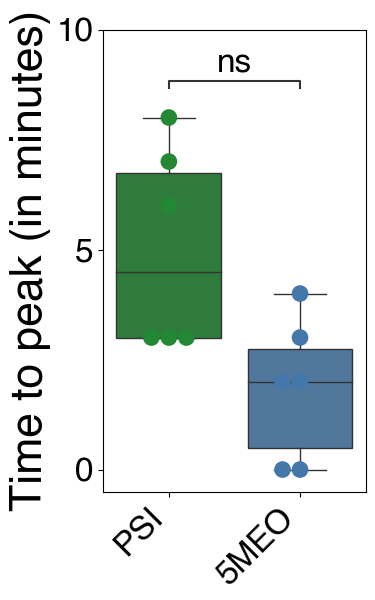

In [6]:
# Processing
import seaborn as sns
from statannotations.Annotator import Annotator
import importlib
import numpy as np

sys.path.append('../functionScripts/')

# Make a box and whisker plot of the df data representing each drug and time_to_peak
# df = df[df['drug'].isin(['Psilocybin', '5-MeO-DMT'])]
importlib.reload(hf)

colorDict = hf.create_color_dict()

# Plot the box and whisker plot
plt.figure(figsize=(figWidthHT_Peak, figHeight))

plotOrder = ['Psilocybin', '5-MeO-DMT']
tickLabels = ['PSI', '5MEO']

df = df[df['drug'].isin(plotOrder)]

colorPal = [colorDict[tickLabel] for tickLabel in tickLabels]

boxprops = dict()
ax = sns.boxplot(data=df, x= 'drug', y= 'time_to_peak', order=plotOrder, palette=colorPal, boxprops=boxprops, linewidth=lineWidth) 
# remove the legend from ax
ax.legend().remove()

# Overlay the points on the boxplot
sns.swarmplot(data=df, x= 'drug', y= 'time_to_peak', color='black', order=plotOrder, size=12, palette=colorPal) # order=['Psilocybin', '5-MeO-DMT']

pairs = [('5-MeO-DMT', 'Psilocybin')]

annotator = Annotator(ax, pairs, data=df, x='drug', y='total_HTR', order=plotOrder)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

# Label the axes
plt.ylim(-0.5, 10)
plt.xticks(ticks=[0, 1], labels=tickLabels, rotation=45, ha='right')

# Change the tick labels on the y axis to be only every 50
plt.yticks(np.arange(0, 11, 5))

plt.ylabel('Time to peak (in minutes)', fontsize=25*1.28)
plt.xlabel('', fontsize=8)
plt.savefig(f"HTR_TimeToPeak.svg", dpi=300, format='svg', bbox_inches='tight')
plt.show()


# April_summary_data plot

In [16]:
dataDir = '../Data/behavioral/april_summary_data.csv'
# dataDir = '../Data/behavioral/april_summary_data.csv'
df = pd.read_csv(dataDir)
df.head()


,animal,sex,dose,total_HTR,time_to_peak,peak_val,FWHM_length,FWHM_val
0,psilo_1,Female,Psilocybin,71.000000,5,3.333333,13,2.166667
1,psilo_2,Female,Psilocybin,61.000000,1,2.333333,28,1.666667
2,psilo_3,Female,Psilocybin,60.333333,5,2.666667,9,2.000000
3,psilo_4,Male,Psilocybin,49.666667,2,2.666667,7,1.833333
4,psilo_5,Male,Psilocybin,74.666667,6,3.000000,18,1.666667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


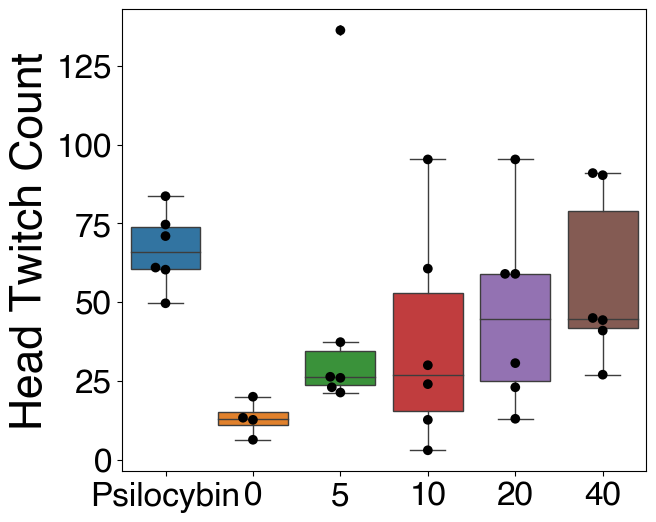

In [17]:

# Processing
import seaborn as sns
# from statannotations import add_stat_annotation
from statannotations.Annotator import Annotator
import importlib
import numpy as np

sys.path.append('../functionScripts/')

# Make a box and whisker plot of the df data representing each drug and time_to_peak
# df = df[df['drug'].isin(['Psilocybin', '5-MeO-DMT'])]
# df = df[df['drug'].isin(['Psilocybin', '5-MeO-DMT'])]
importlib.reload(hf)

colorDict = hf.create_color_dict()

# Plot the box and whisker plot
plt.figure(figsize=(figWidthHT_Count, figHeight))

# plotOrder = ['Saline', '6-Fluoro-DET', 'Psilocybin', '5-MeO-DMT']
# tickLabels = ['SAL', '6-F-DET', 'PSI', '5MEO']
# colorPal = [colorDict[tickLabel] for tickLabel in tickLabels]

boxprops = dict() # alpha=0.7
ax = sns.boxplot(data=df, x= 'dose', y= 'total_HTR', boxprops=boxprops, linewidth=lineWidth)  #, palette=colorPal , order=plotOrder
ax.legend().remove() 
sns.swarmplot(data=df, x= 'dose', y= 'total_HTR', color='black', size=7) # order=['Psilocybin', '5-MeO-DMT'] #, palette=colorPal , order=plotOrder
 
# Stats - Place here to keep lines within the figure.
# pairs = [('Saline', 'Psilocybin'), ('6-Fluoro-DET', 'Psilocybin'), ('Saline', '5-MeO-DMT'), ('6-Fluoro-DET', '5-MeO-DMT')]
# annotator = Annotator(ax, pairs, data=df, x='drug', y='total_HTR', order=plotOrder)
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

# Label the axes
# plt.ylim(0, 150)
# plt.xticks(ticks=[0, 1, 2, 3], labels=tickLabels, rotation=45, ha='right')
# plt.yticks(np.arange(0, 151, 50))

plt.ylabel('Head Twitch Count', fontsize=30*1.067)
plt.xlabel('', fontsize=8)

plt.savefig(f"HTR_5MEO_doses.svg", dpi=300, format='svg', bbox_inches='tight')
plt.show()